**<center><font size=6>CS490: Machine Learning</font><br></center>**

# Numpy, MatPlotLib, and Course Tools Tutorial
<hr>

In this notebook, we will go through some basics of the python tools for numerical computing and plotting, as well as some of the code framework we will be using in class.

## NumPy
There are many libraries for scientific computing in python, but NumPy (http://www.numpy.org/) is one of the most common and well established. NumPy gives a relatively efficient framework for manipulating fixed-type arrays, such as vectors, matrices, and tensors, as well as extensive libraries for common operations on those structures, such as computing data statistics, linear algebraic operations, and much more. Many of its core operations are similar to Matlab/Octave, although it is more flexible and Pythonic.

## MatPlotLib
MatPlotLib (http://matplotlib.org/) is a library for generating plots and figures in Python, specifically modeled to mimic the capabilities of Matlab for generating easy visualizations. There are many alternative libraries for plotting data, some with featurs that matplotlib lacks, but matplotlib's simplicity and similarity to Matlab syntax and capabilities have made it fairly popular.

## SciPy
We will also occasionally need SciPy (http://www.scipy.org/), which has some functions not included in NumPy.

## Course Tools
We will also use some simple machine learning tools developed for the class. These are not an offical library, so you'll just install them like your own source code -- place the "mltools" directory (not just the files, but the directory itself) in either your current working directory, or in a directory on your python path. (You can check that this is working by running:

If you get an error, the code is not located correctly.

Note that, while these tools are useable for your own projects, they are intended to provide a simplified skeleton of how various machine learning techniques work for the educational purpose of understanding the concepts and writing and examining a number of fundamental algorithms. If you are interested in using a more fully-featured library for practice (or in your projects later in the semester) there are a number of excellent options, including

PyLearn2 (Python), http://deeplearning.net/software/pylearn2/ <br>
PMTK3 (Octave), https://github.com/probml/pmtk3

<hr>

## NumPy Basics
We will use NumPy for representing data matrices and vectors. We will do a more thorough review in a few weeks of the linear algebra concepts and operations necessary for manipulating matrices and vectors, but for now, think of a vector as a list of numbers, a matrix as a 2d list, and scalar values as regular numbers. 

### Defining arrays of data
To define one-dimensional arrays (vectors), we can use numpy's "array" object and pass it a list of values:

In [1]:
import numpy as np

a = np.array([1,2,3,4,5,6,7])
# or equivalently, using Python iterables:
a = np.array( range(1,8) )
print(a)

[1 2 3 4 5 6 7]


To make a 2D array (matrix), provide the constructor with a list of lists:

In [2]:
A = np.array( [[1,2,3,4],[5,6,7,8],[9,10,11,12]] )
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


For linear algebra-like operations will usually want "vectors" of size (m,1) or size (1,n) -- in other words, two-dimensional matrices. (Note: there is a numpy class "matrix" that is specialized to linear algebra, but you should be a bit careful mixing "array" and "matrix" objects; so for now we'll stick with arrays).

In [3]:
# A row vector can be created as:
b = np.array( [[1,2,3,4,5,6,7]])
# and a column vector as
bT = np.array( [[1],[2],[3],[4],[5],[6],[7]] )
# that's pretty inconvient, so we usually just use the "transpose" operator:
bT = np.array( [[1,2,3,4,5,6,7]]).T

One thing to notice is that *a*  and  *b*  are not quite the same!  *a*  is a vector with shape *(7,)*, while  *b*  is actually a matrix with shape *(1,7)* -- it has two dimensions, one of which just happens to be one.

In [4]:
print("a's shape: ",a.shape,"; \t b's shape: ",b.shape)

a's shape:  (7,) ; 	 b's shape:  (1, 7)


The difference here is pretty semantic, but can make a difference to python -- so if you're getting shape errors, check what shape your variables are and make sure that's what's expected. You can use "atleast_2d" to force a vector to become a matrix, but be careful of what size is created:

In [5]:
aNew = np.atleast_2d(a)
print("shape after 2D: ", aNew.shape)

shape after 2D:  (1, 7)


There are several useful constructors for matrices that automatically "fill" a matrix of some shape:

In [6]:
A0 = np.zeros( (3,4) )    # create a 3x4 matrix of all zeros
A1 = np.ones( (4,4) )     # create a 3x4 matrix of all ones
Ru = np.random.rand(2,2)  # create a 2x2 matrix of uniform random numbers, in [0,1)
Rn = np.random.randn(3,2) # create a 3x2 matrix of Gaussian random numbers, with mean 0 and variance 1
B = np.tile(b, (3,2))     # create a matrix by "tiling" copies of b (3 copies by 2 copies)

A very useful constructor is linspace (and similarly logspace)

In [7]:
b = np.linspace(1.0,7.0,4) # length-4 vector interpolating between 1.0 and 7.0
c = np.logspace(0.0,2.0,7) # length-7 vector interpolating between 10^0 and 10^2 logarithmically

### Array indexing
Arrays can be indexed in simple and useful ways. The *(i,j)th* entry in a matrix is simply:

In [8]:
print("A[2,0]=",A[2,0])   # 3rd row, 1st column

A[2,0]= 9


To reference an entire row or column, use the slice operator ":"

In [9]:
print("A[0,:]=",A[0,:])
print("A[:,1]=",A[:,1])

A[0,:]= [1 2 3 4]
A[:,1]= [ 2  6 10]


Note that these are now vectors, **not** size-1 matrices, per the previous discussion.

You can use more general slicing with steps:

In [10]:
print("A[1,0:2]=",A[1,0:2])
print("A[0,0:4:2]=",A[0,0:4:2])

A[1,0:2]= [5 6]
A[0,0:4:2]= [1 3]


It is often useful to use lists to slice out particular rows or columns. You can do this with one row and several columns (or vice versa):

In [11]:
print ("A[2, [1,4]]=",A[2, [0,3]])

A[2, [1,4]]= [ 9 12]


or all rows and selected columns (or vice versa)

In [13]:
print("A[:, [1,4]]=\n",A[:, [0,3]])

A[:, [1,4]]=
 [[ 1  4]
 [ 5  8]
 [ 9 12]]


### Arithmetic operations
Arithmetic operations are defined for arrays, i.e.,

In [14]:
a  = a+2
# or
a += 2

adds the scalar value 2 (i.e., the regular integer 2) to every entry of a; similarly for *,-,/, etc.

You can add two vectors if they are the same size:

In [15]:
print("a + 2*c = ",a+2*c)

a + 2*c =  [  7.          10.30886938  16.28317767  28.          52.0886938
 102.83177667 211.        ]


but you cannot add two vectors that are not the same size (unless one is a scalar):

In [17]:
try:
    print("a + b = ",a+b)  # raises a ValueError exception
except:
    print("Got exception!")

Got exception!


Operators are interpreted as elementwise, so that a*c is a vector:

In [18]:
print(a * c)

[   5.           12.92660814   32.49112184   80.          193.8991221
  464.15888336 1100.        ]


Linear-algebraic operations are also defined for vectors and matrices (we will do more with this in a few weeks):

In [19]:
a.dot(c.T)  # The dot product between vectors a and c
A.dot(b.T)  # The matrix-vector product of A and  c

array([ 50., 114., 178.])

Elementwise powers are ** (raising each element in the matrix individually to the specified power) while matrix powers (raising the entire matrix to the given power using the dot product) use the linalg module:

In [20]:
R=A**2,                        # The elementwise square of A: R(i,j)=A(i,j)^2
R=np.linalg.matrix_power(A1,2)  # The matrix product R=A1*A1: R(i,j)=\sum_k A1(i,k)*A1(k,j)

***NOTE:***
As mentioned above, numpy also includes a "matrix" class, which wraps / redefines the "array" class for matrix objects, the operator "*" means matrix multiplication, and "**" matrix power So, be careful which type of object you make! We usually want both matrix-like operators and array-like operators, so for consistency I usually define the objects to be arrays, and use "dot" when I want matrix operations.

### Logical operands and logical indexing

It's often useful to use elementwise logical operations, which produce new (logical) vectors and matrices:

In [21]:
a = np.array([0,1,2])
b = np.array([0,0,2])

# comparison operators produce new logical vectors or matrices:
print("a==b : ",a==b)   # prints logical vector [1,0,1]
print("a!=b : ",a!=b)  # prints logical vector [0,1,0]
print("a<2  : ",a<2)   # prints logical vector [1,1,0]

a==b :  [ True False  True]
a!=b :  [False  True False]
a<2  :  [ True  True False]


For use in flow control (if, etc.), you probably want to convert these to scalars with any or all:

In [22]:
print("Any? ",np.any( a!=b ))   # true if any a(i)!=b(i) for some i 
print("All? ",np.all( a==b ))  # true if all a(i)=b(i) for every i 

Any?  True
All?  False


For matrices, you may want to only collapse one or more dimensions:

In [23]:
M=[[0,1],[0,0]]; 
print(np.any( M , axis=0))      # acts on individual columns of M; returns a logical row vector 

[False  True]


We can use these logical vectors and matrices for indexing, such as to extract sub-matrices:

In [24]:
print("Positive entries of a: ", a[ a>0 ])

Positive entries of a:  [1 2]


<hr>

## MatPlotLib for plotting
MatPlotLib gives a nice plotting interface similar to Matlab / Octave.

### Scatterplots and line plots
The most typical action is to plot one sequence (x-values) against another (y-values); this can be done using disconnected points (a scatterplot), or by connecting adjacent points in the sequence (in the order they were provided). The latter is usually used to give a nice (piecewise linear) visualization of a continuous curve, by specifying x-values in order, and the y-values given by the function at those x-values:

In [25]:
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline
#import mpld3                       # mpld3 is a "interactive plot" widget for ipython notebook
#mpld3.enable_notebook()            # uncomment to be able to zoom into plots, etc.

Plotting a scatter of data points:

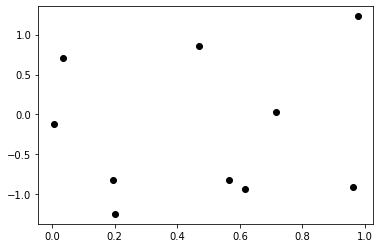

In [26]:
x_values = np.random.rand(1,10)   # unformly in [0,1)
y_values = np.random.randn(1,10)  # Gaussian distribution
plt.plot(x_values, y_values, 'ko');

The string determines the plot appearance -- in this case, black circles. You can use color strings ('r', 'g', 'b', 'm', 'c', 'y', ...) or use the "Color" keyword to specify an RGB color. Marker appearance ('o','s','v','.', ...) controls how the points look.

If we connect those points using a line appearance specification ('-','--',':',...), it will not look very good, because the points are not ordered in any meaningful way. Let's try a line plot using an ordered sequence of x values:

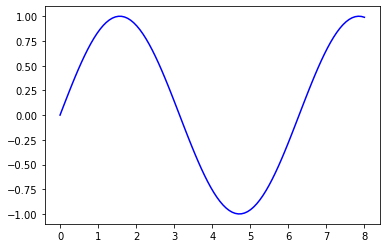

In [27]:
x_values = np.linspace(0,8,100)
y_values = np.sin(x_values)
plt.plot(x_values,y_values,'b-');

This is actually a plot of a large number of points (100), with no marker shape and connected by a solid line.

For plotting multiple point sets or curves, you can pass more vectors into the plot function, or call the function multiple times:

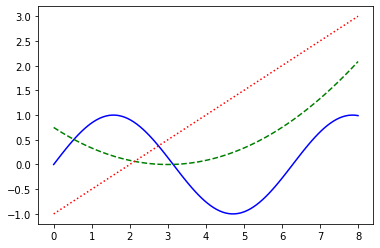

In [28]:
x_values = np.linspace(0,8,100)
y1 = np.sin(x_values)         # sinusoidal function
y2 = (x_values - 3)**2 / 12   # a simple quadratic curve
y3 = 0.5*x_values - 1.0       # a simple linear function

plt.plot(x_values, y1, 'b-', x_values, y2, 'g--');  # plot two curves
plt.plot(x_values, y3, 'r:'); # add a curve to the plot

You may want to explicitly set the plot ranges -- perhaps the most common pattern is to plot something, get the plot's ranges, and then restore them later after plotting another function:

(-0.4, 8.4, -1.099652011574681, 1.0998559934443881)


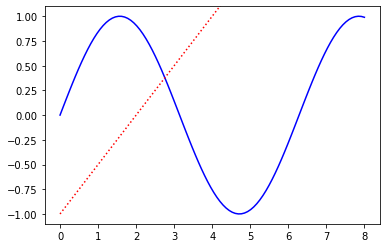

In [30]:
x_values = np.linspace(0,8,100)
y1 = np.sin(x_values)         # sinusoidal function
y3 = 0.5*x_values - 1.0       # a simple linear function

plt.plot(x_values, y1, 'b-') 
ax = plt.axis()               # get the x and y axis ranges
print(ax)
# you can set or modify the axis values explicitly if you want...

# now plot something else (which will change the axis ranges):
plt.plot(x_values, y3, 'r:'); # add the linear curve
plt.axis(ax);                 # restore the original plot's axis ranges

### Histograms
Histograms are also useful visualizations:

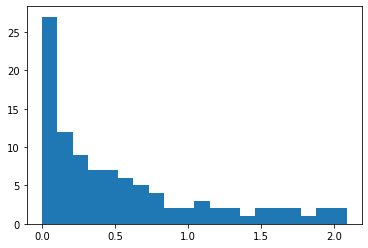

In [31]:
plt.hist(y2, bins=20);

The outputs of hist include the bin locations, the number of data in each bin, and the "handles" to the plot elements to manipulate their appearance, if desired.

### Subplots and plot sizes
It is often useful to put more than one plot together in a group; you can do this using the subplot function. There are various options; for example, "sharex" and "sharey" allow multiple plots to share a single axis range (or, you can set it manually, of course).

I often find it necessary to also change the geometry of the figure for multiple subplots -- although this is more generally useful as well, if you have a plot that looks better wider and shorter, for example.

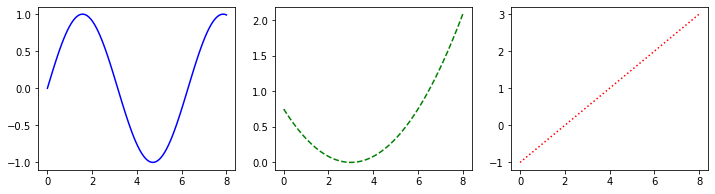

In [32]:
plt.rcParams['figure.figsize'] = (12.0, 3.0)
fig,ax = plt.subplots(1,3)      # make a 1 x 3 grid of plots:
ax[0].plot(x_values, y1, 'b-');   # plot y1 in the first subplot
ax[1].plot(x_values, y2, 'g--');  #   y2 in the 2nd
ax[2].plot(x_values, y3, 'r:');   #   and y3 in the last

plt.rcParams['figure.figsize'] = (6.0, 4.0);  # restore default plot size after 

<hr>

## Practice Problems: Data Exploration

In these problems, we will compute some basic statistics and create visualizations of an example data set.
First, make sure you have cloned the Homework 0 repository to your computer. You will be using the course code (the `mltools` directory) and the "Fisher iris" data set introduced in lecture (in the `data` directory) . Load the data into Python (be sure to run the following block so the data is loaded into your notebook):

In [2]:
import numpy as np # numpy has already been imported into the notebook, but we do it again here for the exercise
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None)  # load the text file
Y = iris[:,-1]              # target value (iris species) is the last column
X = iris[:,0:-1]            # features are the other columns

The Iris data consists of four real-valued features used to predict which of three types of iris
flower was measured (a three-class classification problem). Use this data to complete the following problems:

**1. Use `X.shape` to get the number of features and the number of data points. Report both numbers, mentioning which number is which.**

In [3]:
# Your code here for getting the size of the data set
target = Y.shape
features = X.shape
print("Our target data's shape is: ", target)
print("Our feature data's shape is: ", features)


Our target data's shape is:  (148,)
Our feature data's shape is:  (148, 4)


**2. For each feature, plot a histogram (`plt.hist`) of the data values.**

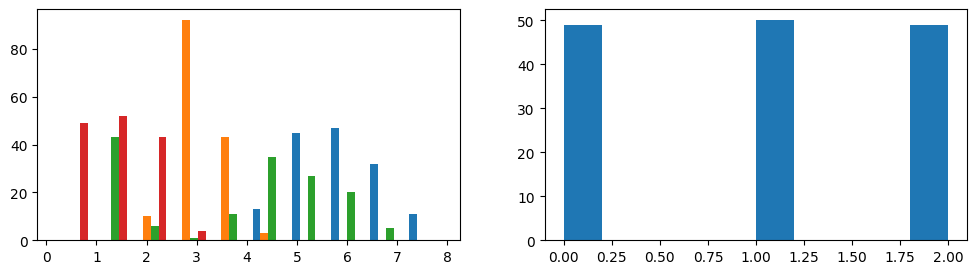

In [4]:
# Your code here for histograms of each feature
plt.rcParams['figure.figsize'] = (12.0, 3.0)
fig,ax = plt.subplots(1,2)      # make a 1 x 3 grid of plots:
ax[0].hist( X, bins=10);   # plot y1 in the first subplot
ax[1].hist( Y, bins=10);


**3. Compute the mean & standard deviation of the data points for each feature (`np.mean`, `np.std`).**

In [5]:
# Your code here for mean and standard deviation for each feature
x_mean = np.mean(X)
print("The mean of our features is: ",x_mean)
Y_mean = np.mean(Y)
print("The mean of our targets is: ",Y_mean)
x_std = np.std(X)
print("The standard deviation of our features is: ",x_std)
y_std = np.std(Y)
print("The standard deviation of our targets is: ",y_std)




The mean of our features is:  3.517786251554054
The mean of our targets is:  1.0
The standard deviation of our features is:  1.9755108699052022
The standard deviation of our targets is:  0.813733471206735


**4. For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot (see `plt.plot`
or `plt.scatter`) of
the feature values, colored according to their target value (class).
(For example, plot all data points with *y=0* as blue, *y=1* as green, and *y=2* as red.)**

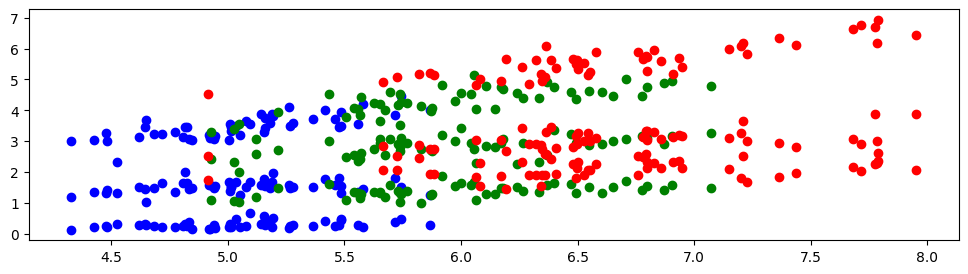

In [6]:
# Your code here for color-coded scattor plots of the features.

for index in range(len(X)) :
    color_value = Y[index]
    current_data = X[index]    
    plot_color = "blue"
    if color_value == 1:
        plot_color = "green"
    elif color_value == 2:
        plot_color = "red"
    
    for index in range(len(current_data)):
        if index != 0:
            plt.scatter(current_data[0], current_data[index], color=plot_color)
    

